In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from IPython.display import display
import copy
import seaborn as sns

from util import *

In [2]:
train_in_one_data = read_data_for_transformer('datas/txts/train_in_one_seed1_5.txt')
sperately_data = read_data_for_transformer('datas/txts/spearately_for_train_in_one_problem_seed1_5.txt')
sperately_data_for_not_in_train_in_one = read_data_for_transformer('datas/txts/spearately_for_not_in_train_in_one.txt')

In [3]:
# draw sperate not in continual
j=0 # begin from 1, jump problem1
problem_set = [2,11,18,19,22,23]
ground_truth = [-100,-100,-5,-220,-100,0]
problem_set = [3,4,5,6,7,8,9,10,12,13,14,15,16,17,20,21]
problem_num = len(problem_set)
data = {}
for problem in problem_set:

    print(f'problem{problem}')

    epochs = []
    means = []
    stds = []
    means2 = []
    stds2 = []

    for i in range(100):
        piece = []
        piece.append(sperately_data_for_not_in_train_in_one[j*100 + i][2])
        piece.append(sperately_data_for_not_in_train_in_one[problem_num*100+ j*100 + i][2])
        piece.append(sperately_data_for_not_in_train_in_one[problem_num*100*2 + j*100 + i][2])
        piece.append(sperately_data_for_not_in_train_in_one[problem_num*100*3 + j*100 + i][2])

        mean = np.mean(piece)
        var = np.std(piece)
        #epochs.append(i)
        epochs.append(i * 16)
        #means.append(mean)
        means.append(-mean)
        stds.append(var)

    data.update({f'Means_{problem}': means, f'Vars_{problem}': stds})
    j = j + 1
data.update({'Epoch': epochs})
# add problem 1, problem  1 in train_in_one is same with single train 
i=0
means = []
stds = []
for i in range(100):
    piece = []
    piece.append(train_in_one_data[i][2])
    piece.append(train_in_one_data[700+ i][2])
    piece.append(train_in_one_data[1400 + i][2])
    piece.append(train_in_one_data[2100 + i][2])

    mean = np.mean(piece)
    var = np.std(piece)
    means.append(-mean)
    stds.append(var)    

problem_set.append(1)
data.update({f'Means_1': means, f'Vars_1': stds})
df = pd.DataFrame(data)
display(df)


problem3
problem4
problem5
problem6
problem7
problem8
problem9
problem10
problem12
problem13
problem14
problem15
problem16
problem17
problem20
problem21


,Means_3,Vars_3,Means_4,Vars_4,Means_5,Vars_5,Means_6,Vars_6,Means_7,Vars_7,...,Vars_16,Means_17,Vars_17,Means_20,Vars_20,Means_21,Vars_21,Epoch,Means_1,Vars_1
0,29357.728125,1049.960453,109.459375,5.744135,176.651042,15.174776,70.680208,4.345990,170.947917,8.312777,...,3.065060,14.520833,1.242418,315.202083,8.255952,512.670833,35.778120,0,195.306250,2.240614
1,30912.903125,854.992354,114.222917,4.665439,189.688542,9.345753,74.742708,2.799260,177.453125,7.711241,...,2.907552,16.734375,2.295809,344.143750,19.897798,524.185417,17.683314,16,204.350000,4.708793
2,32283.369792,677.455548,115.045833,4.621847,192.060417,6.436995,74.490625,1.770160,181.340625,6.825206,...,2.988573,16.896875,2.066163,358.512500,18.409929,548.239583,31.813006,32,210.237500,5.503931
3,32729.118750,645.476161,115.838542,4.079752,195.292708,5.700877,74.954167,1.848094,183.948958,9.259376,...,3.500369,16.809375,1.219917,360.460417,10.830184,556.064583,32.336762,48,214.018750,4.920908
4,32821.006250,478.062185,115.360417,3.706617,201.673958,8.226153,75.671875,1.431189,186.308333,6.549198,...,2.844835,19.392708,0.938159,367.114583,23.738283,558.122917,34.115458,64,215.933333,7.206372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,35278.943750,622.197560,120.458333,0.138098,214.689583,1.182844,79.608333,0.446932,196.536458,1.533204,...,4.406013,26.607292,2.527174,409.270833,5.681346,625.927083,6.731973,1520,233.129167,6.017124
96,35133.789583,780.538890,120.451042,0.152848,214.787500,1.099712,79.433333,0.615800,196.357292,1.328685,...,4.638199,26.438542,1.783514,410.145833,5.266840,625.152083,8.102729,1536,233.022917,5.964098
97,35272.770833,617.707903,120.340625,0.203621,214.712500,1.152334,79.368750,0.693913,196.386458,1.350490,...,4.880028,27.469792,1.573005,409.712500,5.753630,630.341667,2.153461,1552,233.180208,5.773103
98,35229.262500,640.027098,120.442708,0.118379,214.794792,1.028881,79.468750,0.614202,196.544792,1.401934,...,4.238907,27.668750,1.488925,410.050000,4.860102,630.443750,2.552520,1568,233.146875,5.784762


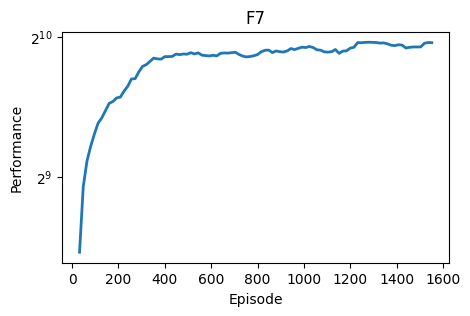


,Means_3,Vars_3,Means_4,Vars_4,Means_5,Vars_5,Means_6,Vars_6,Means_7,Vars_7,...,Vars_16,Means_17,Vars_17,Means_20,Vars_20,Means_21,Vars_21,Epoch,Means_1,Vars_1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31620.825208,741.189340,113.985417,4.563558,191.073333,8.976911,74.107917,2.438938,179.999792,7.731560,...,3.061278,16.870833,1.552493,349.086667,16.226429,539.856667,30.345332,32.0,207.969167,4.916124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,35238.326458,664.586875,120.145833,0.635137,214.557292,1.263186,79.497500,0.417552,195.880417,1.734998,...,5.657534,27.701458,1.799975,409.444167,6.325779,628.902083,4.355927,1488.0,233.151250,5.909068
96,35210.576458,694.730641,120.142292,0.632779,214.577917,1.267774,79.516250,0.484821,195.882083,1.720258,...,5.709282,27.361042,1.844689,409.776667,5.723458,627.834583,5.421337,1504.0,233.126458,5.912259
97,35209.909167,692.742995,120.371042,0.230354,214.678542,1.164594,79.476458,0.556406,196.335625,1.340147,...,5.802411,27.256250,1.788572,410.014167,5.437264,628.129583,5.011690,1520.0,233.124167,5.915131
98,35201.730625,696.254519,120.411667,0.170197,214.696042,1.142377,79.452292,0.595042,196.433750,1.402355,...,5.769261,27.216667,1.808698,409.950833,5.300133,628.301250,4.735535,1536.0,233.143333,5.873594


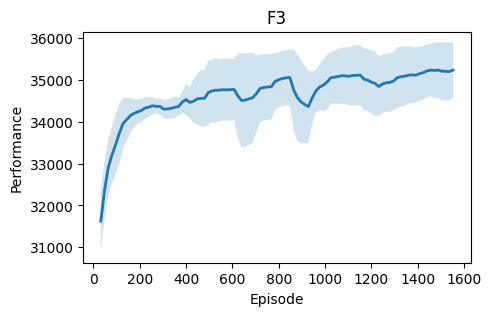

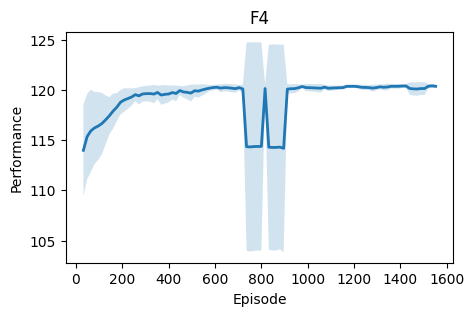

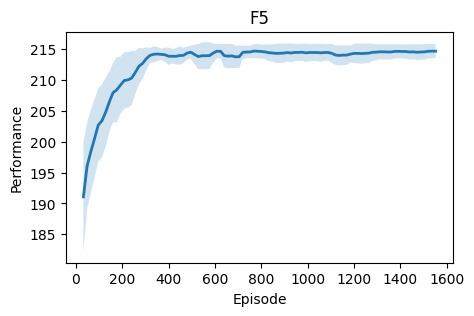

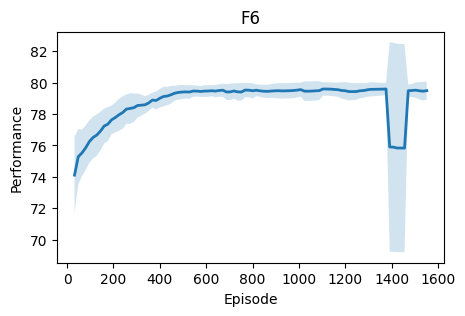

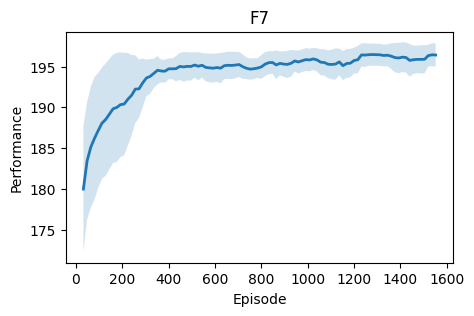

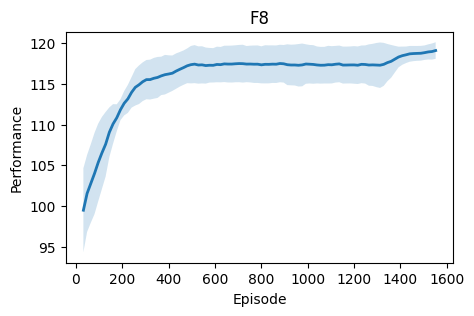

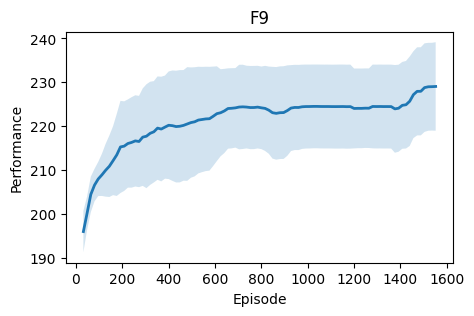

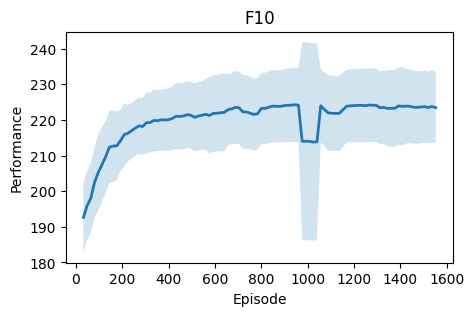

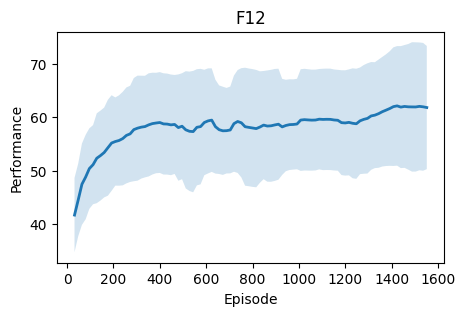

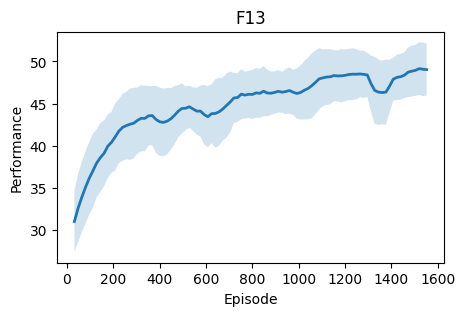

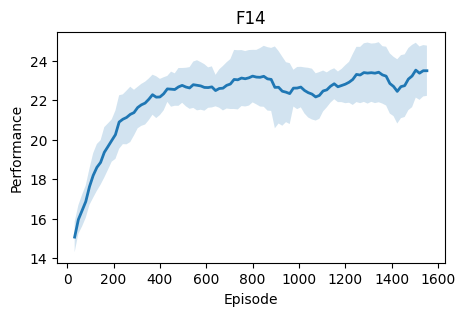

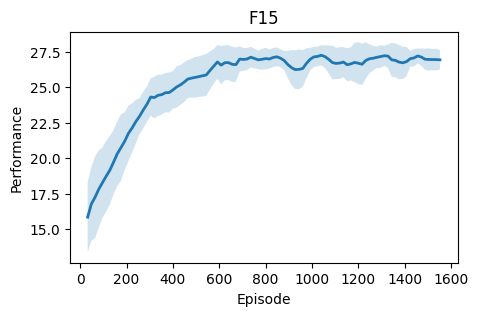

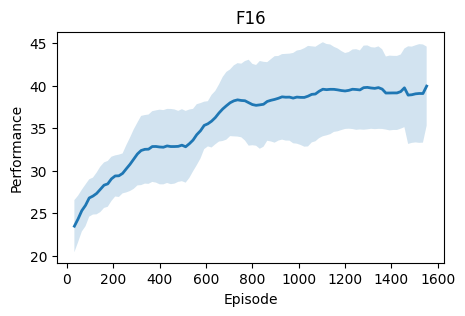

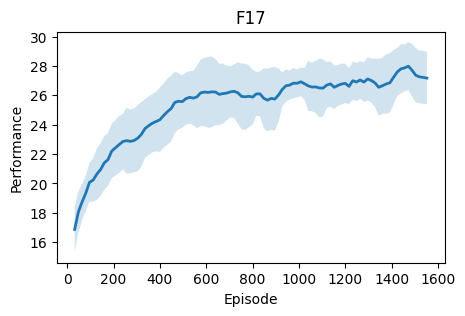

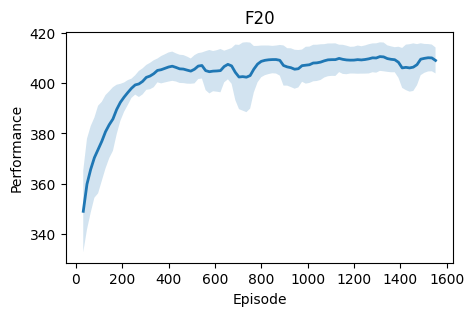

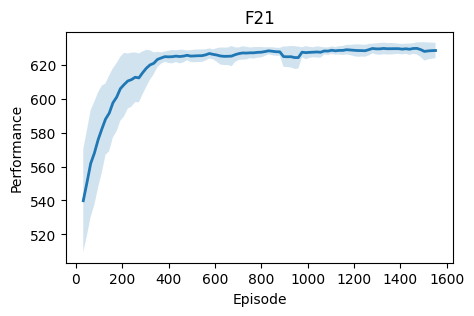

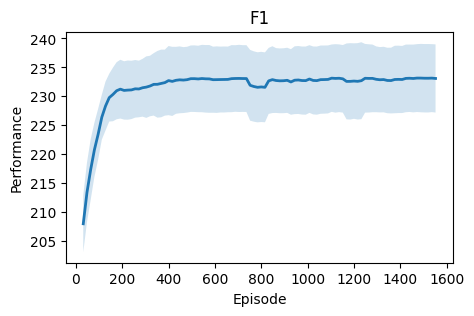

In [4]:
from matplotlib.ticker import ScalarFormatter
_new_df = copy.deepcopy(df)
new_df = _new_df.rolling(window=5, center=False).mean() 
display(new_df)
show_std = True
for problem in problem_set:
    plt.figure(figsize=(5, 3))
    plot_each(plt, new_df['Epoch'], new_df[f'Means_{problem}'], new_df[f'Vars_{problem}'], f's_problem{problem}',show_stds=show_std)
    plt.title(f'F{problem}')
    plt.xlabel('Episode')
    plt.ylabel('Performance')
    if show_std:
        plt.savefig(f'result_pictures/single_problem_with_std\F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')
    else:
        plt.savefig(f'result_pictures/single_problem\F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')

In [5]:
# draw sperate in continual problem set
j=0 # begin from 1, jump problem1

problem_set = [2,11,18,19,22,23]
problem_num = 7
data = {}
for problem in problem_set:

    print(f'problem{problem}')

    epochs = []
    means = []
    stds = []
    for i in range(100):
        piece = []
        piece.append(sperately_data[j*100 + i][2])
        piece.append(sperately_data[problem_num*100+ j*100 + i][2])
        piece.append(sperately_data[problem_num*100*2 + j*100 + i][2])
        piece.append(sperately_data[problem_num*100*3 + j*100 + i][2])

        mean = np.mean(piece)
        std = np.std(piece)
        means.append(-mean)
        stds.append(std)
        epochs.append(i*16)

    data.update({f'S_Means_{problem}': means,f'S_Vars_{problem}': stds})
    j = j + 1
data.update({'Epoch': epochs})
df = pd.DataFrame(data)
display(df)

problem2
problem11
problem18
problem19
problem22
problem23


,S_Means_2,S_Vars_2,S_Means_11,S_Vars_11,S_Means_18,S_Vars_18,S_Means_19,S_Vars_19,S_Means_22,S_Vars_22,S_Means_23,S_Vars_23,Epoch
0,65.482987,73.280661,-4723.110917,8296.580228,-3543.805446,4628.230123,-2652.948958,3590.904656,-2592.419792,2798.656252,-677.149669,1210.517030,0
1,70.557472,75.033779,-2344.694323,4188.753517,-2274.646736,2864.245005,-1031.508333,1211.114982,-3477.143750,4398.589458,-661.913300,1185.380750,16
2,72.417758,76.395717,-1076.219272,1993.460465,-2005.379542,2587.480707,-1092.648958,1287.128263,-2640.645833,3254.123575,-497.618194,899.161733,32
3,75.956266,75.158897,-1768.655151,3202.662634,-1867.256861,2373.309244,-1205.732292,1486.008962,-1847.384375,1933.014835,-580.901135,1049.383898,48
4,75.171642,73.027518,-1662.126567,3016.114056,-1772.884150,2392.776564,-935.769792,1171.107121,-1418.862500,1500.989703,-502.781953,913.316123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,88.639834,75.433565,92.877725,74.812561,-355.836749,727.276678,77.996875,82.627653,-121.220833,301.592048,-447.004993,848.560568,1520
96,87.912886,75.472551,92.707698,74.654702,-416.292486,858.693203,67.638542,90.982074,-126.183333,308.158164,-121.139512,283.438455,1536
97,88.456872,75.406046,92.249181,74.781077,-210.136406,506.558768,82.460417,79.632338,-121.140625,298.923856,29.197025,34.561961,1552
98,88.555382,75.523416,77.171265,78.612602,-181.769682,441.632640,78.547917,81.958125,-132.283333,312.669391,-20.134368,110.322188,1568


,S_Means_2,S_Vars_2,S_Means_11,S_Vars_11,S_Means_18,S_Vars_18,S_Means_19,S_Vars_19,S_Means_22,S_Vars_22,S_Means_23,S_Vars_23,Epoch
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,71.917225,74.579314,-2314.961246,4139.514180,-2292.794547,2969.208329,-1383.721667,1749.252797,-2395.291250,2777.074765,-584.072850,1051.551907,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,88.591237,75.424634,34.433595,148.482525,-228.904382,534.252744,56.448125,112.701156,-139.267083,328.080415,-264.104386,531.733796,1488.0
96,88.479328,75.441621,52.205518,129.677298,-271.471362,607.174852,54.376042,114.445583,-124.429583,304.544340,-252.013790,510.482662,1504.0
97,88.375375,75.444610,52.051016,129.700436,-274.712469,612.197990,55.182083,114.010972,-123.867292,303.689290,-208.218262,436.652213,1520.0
98,88.439664,75.471799,88.612762,75.565086,-273.066128,604.881376,55.417917,113.886252,-125.867917,305.997376,-174.387210,378.273620,1536.0


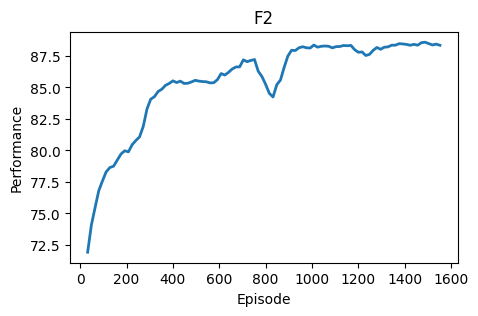

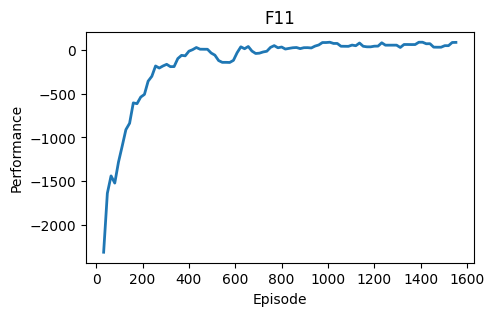

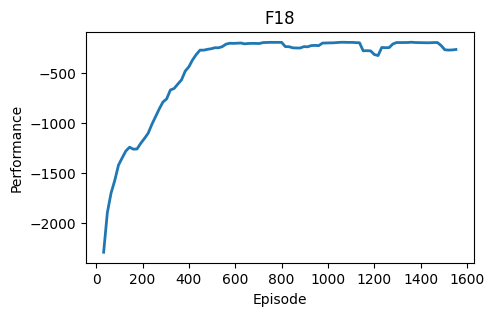

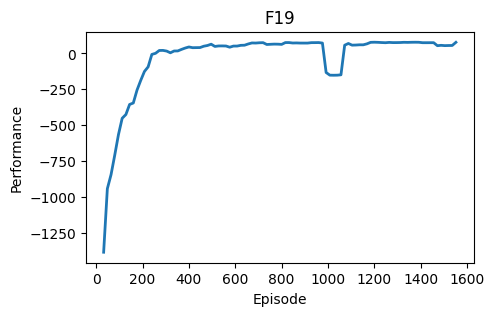

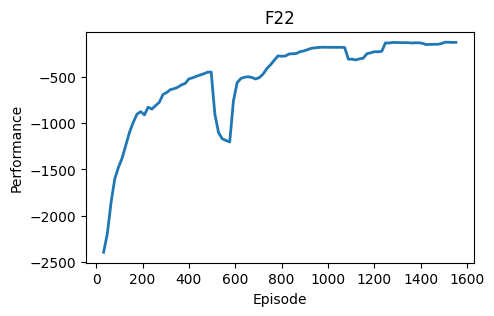

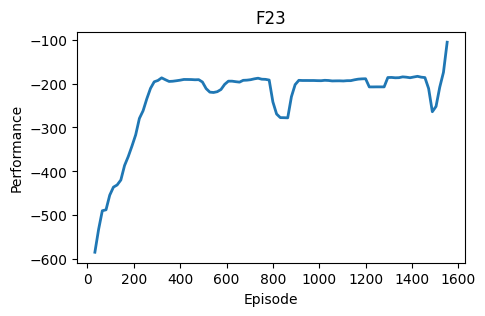

In [6]:
# draw single problem in continue learn problem set

_new_df = copy.deepcopy(df)
new_df = _new_df.rolling(window=5, center=False).mean() 
display(new_df)

for problem in problem_set:
    plt.figure(figsize=(5, 3))
    plot_each(plt, new_df['Epoch'], new_df[f'S_Means_{problem}'], new_df[f'S_Vars_{problem}'], f's_problem{problem}',show_stds=False)
    plt.title(f'F{problem}')
    plt.xlabel('Episode')
    plt.ylabel('Performance')

    plt.savefig(f'result_pictures/single_problem_in_continue/F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')